`Diferencias con el modelo 1`:

- Se elimina columna Meat (muy mal balanceada)
- En los km de coche se deja como está (en vez de cohe si y no)
- Reciclaje de basura: siempre y no siempre (para balancear mejor)


**CONCLUSIÓN**: La inertia es más alta (peor modelo que el modelo inicial).

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



### 1. Open Typeform Data from Survey

In [2]:
df = pd.read_csv("../data/typeform_igb.csv")

df.head()

,#,¿En qué rango de edad te encuentras?,¿Cuántas personas sois en vuestro hogar?,¿En qué provincia vives? Vamos a conocernos un poco mejor 😄,¿De cuál de estos temas te interesaría saber más?,¿Cuánto duran tus duchas?,¿Cuántas veces pones la lavadora a la semana?,¿Cuántas veces pones el lavavajillas?,¿Sueles poner el modo *ECO *en tus electrodomésticos?,¿Reciclas agua para usarlo en otras tareas?,...,"cartón y plástico?""""",¿Cada cuánto consumes *carne*?,¿Cuántos km haces a la semana en coche?,¿Cuánto gastas al mes en comida para gato/perro?,¿Cuántos metros cuadrados tiene tu jardín?,¿Sabes cuánto dinero gastas en tu consumo de agua al mes?,Start Date (UTC),Submit Date (UTC),Network ID,Tags;
0,cb2hsyhk4q48anbuacl1cb2hspesvqca,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,...,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!,2023-05-18 05:55:47,2023-05-18 05:58:06,31494a64d0,;,NaN
1,1lvp0ymwpl878xcfgo1lvp0yhw1vy0ld,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,...,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!,2023-05-18 05:36:34,2023-05-18 05:38:17,26873d694b,;,NaN
2,t5e8kn9ug41t5zdgpgnt5e8kn9dx7xba,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,...,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!,2023-05-18 05:31:31,2023-05-18 05:33:35,6050316def,;,NaN
3,lhrk180jtc1swhx2plhrk18wntdhnix6,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,...,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!,2023-05-18 05:22:13,2023-05-18 05:23:42,903866689d,;,NaN
4,6mv5t8yarw67kj343annxsb6mv5t8yhx,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,...,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €,2023-05-18 05:05:50,2023-05-18 05:08:08,1acecc257c,;,NaN


### Lets remove some unnecesary columns that disturb us

In [3]:
# Drop the first column and last two columns
df = df.drop(df.columns[0], axis=1)  
df = df.iloc[:, :-5] 

df.head()

,¿En qué rango de edad te encuentras?,¿Cuántas personas sois en vuestro hogar?,¿En qué provincia vives? Vamos a conocernos un poco mejor 😄,¿De cuál de estos temas te interesaría saber más?,¿Cuánto duran tus duchas?,¿Cuántas veces pones la lavadora a la semana?,¿Cuántas veces pones el lavavajillas?,¿Sueles poner el modo *ECO *en tus electrodomésticos?,¿Reciclas agua para usarlo en otras tareas?,¿*Reciclas *vidrio,"cartón y plástico?""""",¿Cada cuánto consumes *carne*?,¿Cuántos km haces a la semana en coche?,¿Cuánto gastas al mes en comida para gato/perro?,¿Cuántos metros cuadrados tiene tu jardín?
0,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!
1,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!
2,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!
3,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,A veces,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!
4,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,Siempre,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €


## 2. Exploratory Data Analysis

### Feature and Target Analysis

The dataset contains a list of Spanish residents behaviour of their personal water consumption.

**Features:**

1. Age: 4 groups of age
2. Residents: Number of people who live in a home.
3. Province: What part of Spain are you from.
4. Interests: 
5. Shower
6. Washing machine
7. Dishwasher
8. Eco Mode
9. Water recycling
10. General recycling
11. Meat Consumption
12. Gasoline
13. Pet
14. Garden area
15. Water estimation spent

**Targets:**

We do not now yet. 

* Expected groups:
    * 0: Water Saver 
    * 1: Water Spender
    * 2: Water unconscious

### Rename columns

In [4]:
list = [ "Age",
 "Residents",
 "Province",
 "Interests",
 "Shower",
 "WashingMachine",
 "DishWasher",
 "EcoMode",
 "WaterRecycling",
 "GeneralRecycling",
 "Meat",
 "Gasoline",
 "Pet",
"Garden",
 "Estimation"]

for index,name in enumerate(list):
    df.rename(columns={df.columns[index]: name}, inplace=True)

df.head()

,Age,Residents,Province,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!
1,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!
2,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!
3,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,A veces,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!
4,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,Siempre,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €


### Paint some Data 👨🏻‍🎨

In [5]:
# PAIR PLOT

colors = [ '#ee6c4d', '#98c1d9', '#3d5a80', '#293241']
sns.set_palette(sns.color_palette(colors))

Entre 36 y 65 años    652
Entre 18 y 35 años    425
Mayor de 65 años       82
Menor de 18 años       19
NaN                     4
Name: Age, dtype: int64


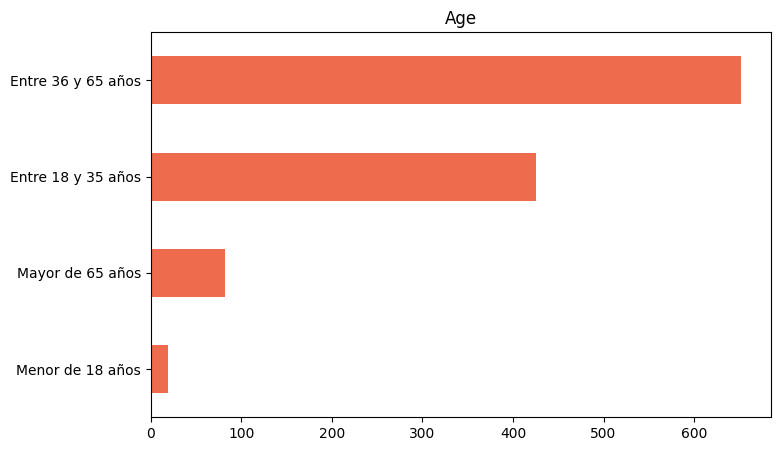

2.0     354
4.0     293
3.0     287
1.0     118
5.0      99
6.0      16
7.0       6
NaN       4
8.0       3
10.0      2
Name: Residents, dtype: int64


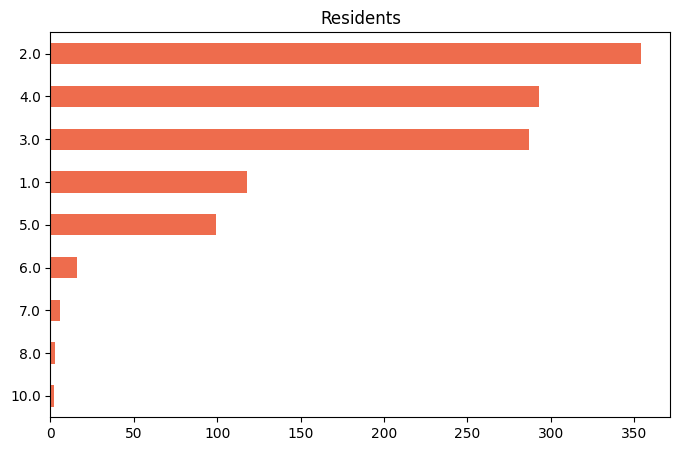

Madrid                    638
Segovia                   201
Asturias                   49
Barcelona                  36
Sevilla                    27
Toledo                     22
Valladolid                 15
Cantabria                  15
Cádiz                      14
A Coruña                   10
Zaragoza                   10
Málaga                      9
Murcia                      7
Huesca                      7
Pontevedra                  7
Valencia                    7
Alicante                    6
Vizcaya                     6
Lugo                        5
Gipuzkoa                    5
Burgos                      5
Las Palmas                  5
Jaén                        5
León                        4
Salamanca                   4
Girona                      4
Huelva                      4
Ávila                       4
La Rioja                    3
NaN                         3
Badajoz                     3
Tarragona                   3
Castellón                   3
Soria     

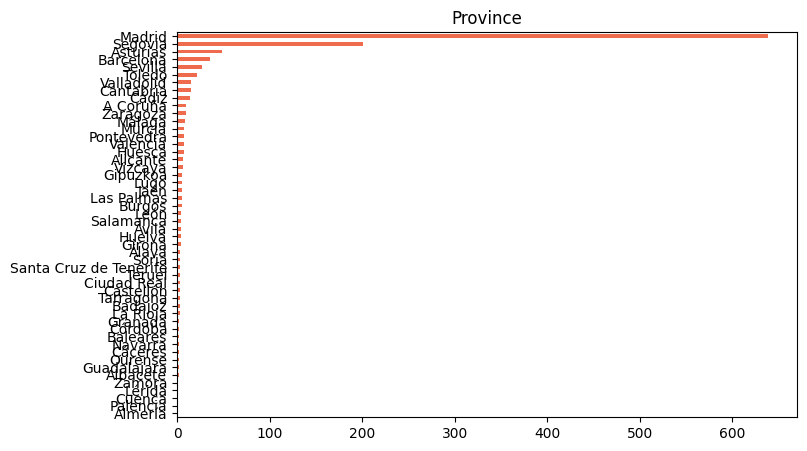

Ayudar al ecosistema         443
Ahorrar agua                 326
Ahorrar dinero               268
Conocer mi huella hídrica    142
NaN                            3
Name: Interests, dtype: int64


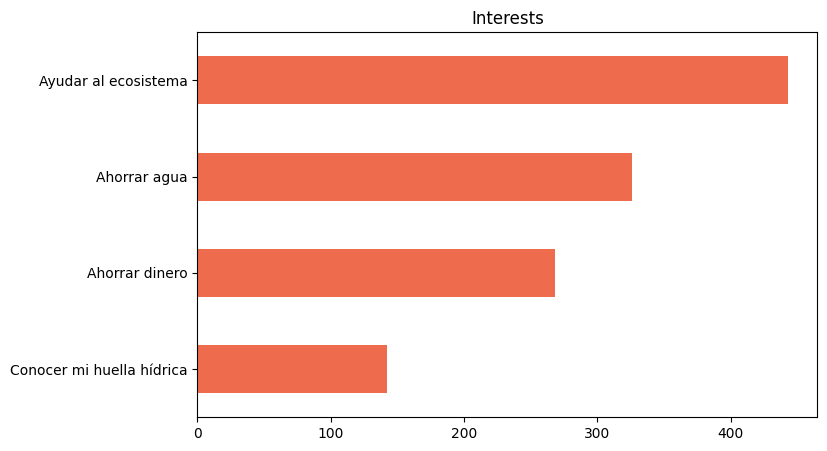

Entre 5 y 10 minutos     594
Menos de 5 minutos       411
Entre 11 y 15 minutos    136
Más de 15 minutos         38
NaN                        3
Name: Shower, dtype: int64


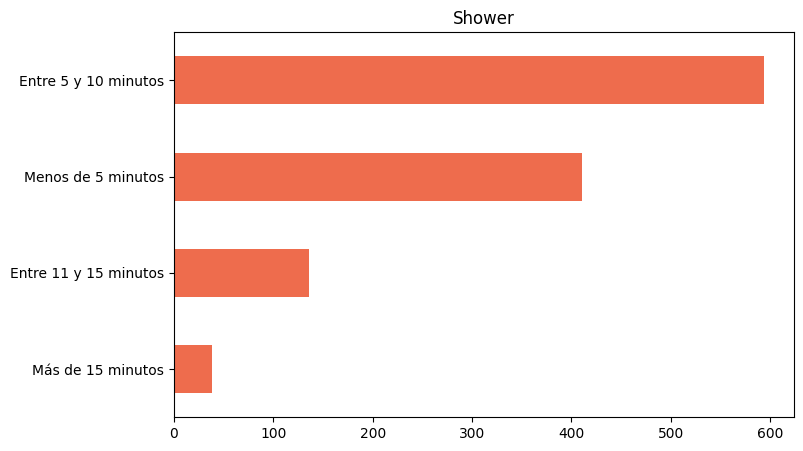

Menos de 3 veces     638
Entre 3 y 5 veces    420
Más de 5             121
NaN                    3
Name: WashingMachine, dtype: int64


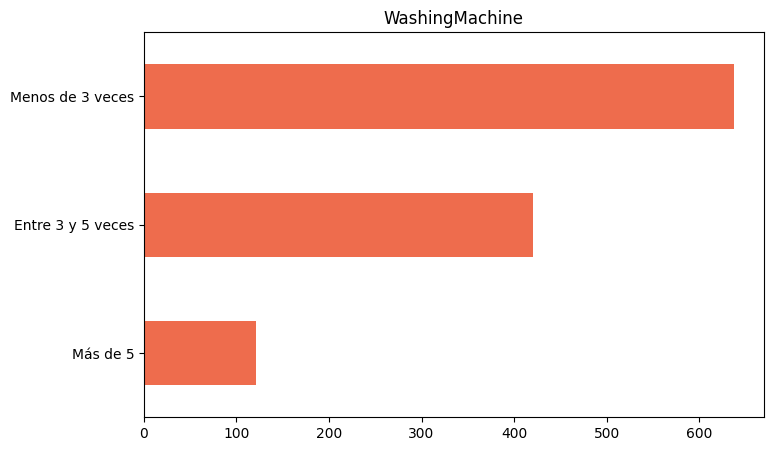

Entre 3 y 5 a la semana    603
Friego a mano              347
1 vez al día               229
NaN                          3
Name: DishWasher, dtype: int64


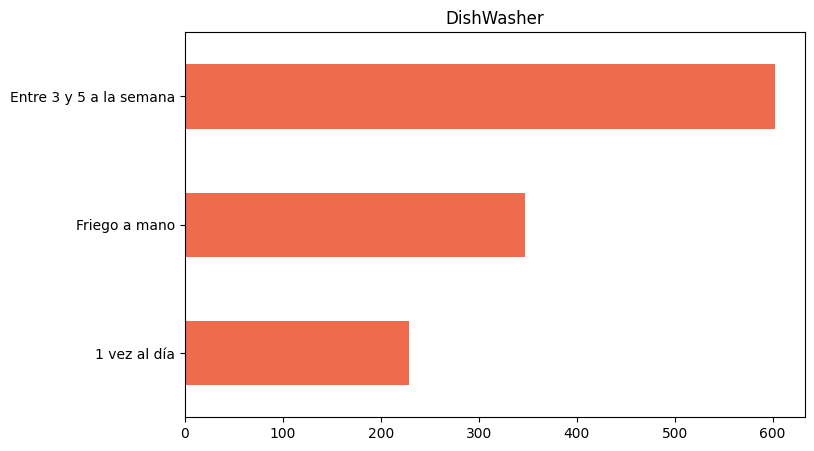

Siempre                          549
A veces                          475
No sabía que existía ese modo    155
NaN                                3
Name: EcoMode, dtype: int64


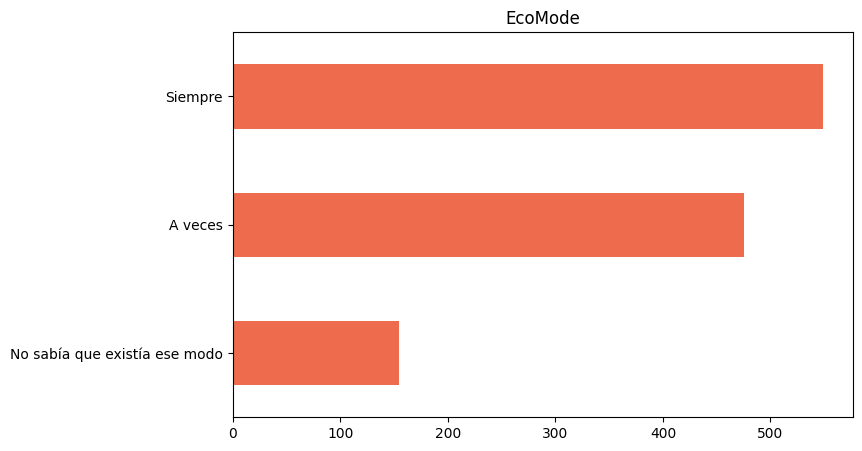

No                             604
Si                             350
Buena idea! Voy a probarlo!    225
NaN                              3
Name: WaterRecycling, dtype: int64


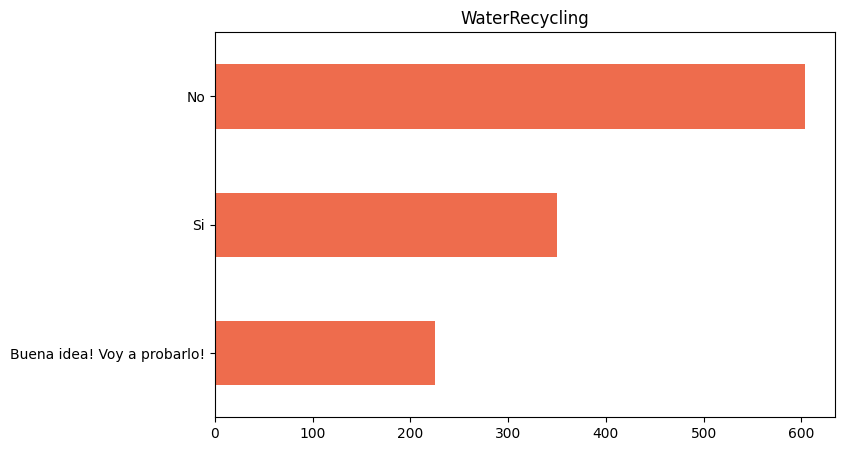

Siempre    829
A veces    294
Nunca!      56
NaN          3
Name: GeneralRecycling, dtype: int64


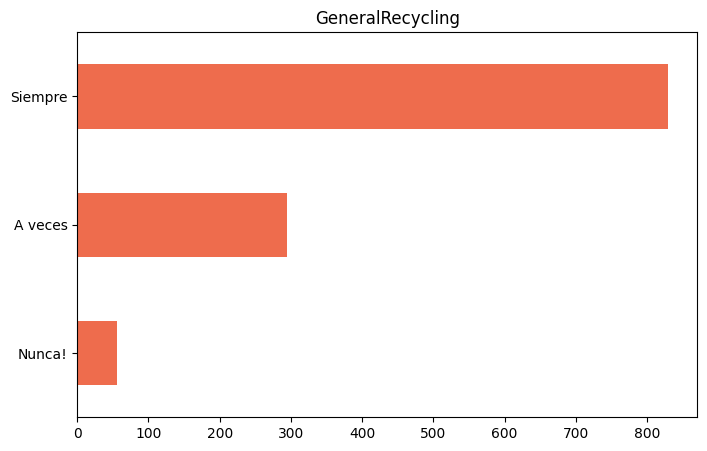

1 vez cada 3 días    575
1 vez al día         376
1 vez a la semana    189
Nunca!                39
NaN                    3
Name: Meat, dtype: int64


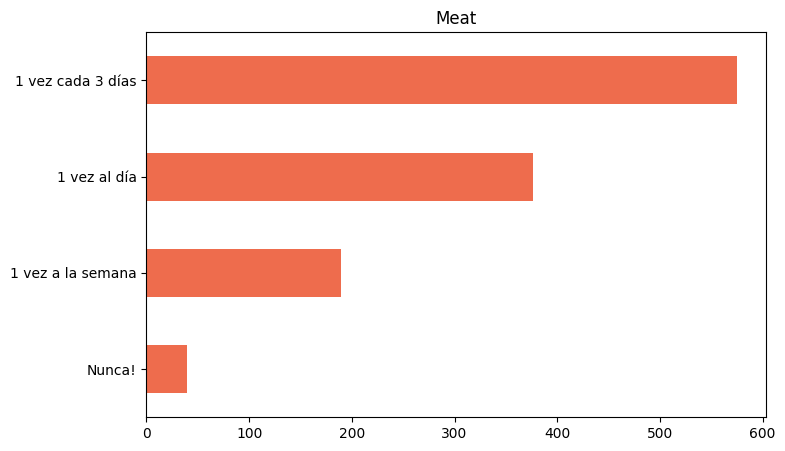

Menos de 100 km    538
No uso coche       289
100 - 200 km       211
Más de 200 km      141
NaN                  3
Name: Gasoline, dtype: int64


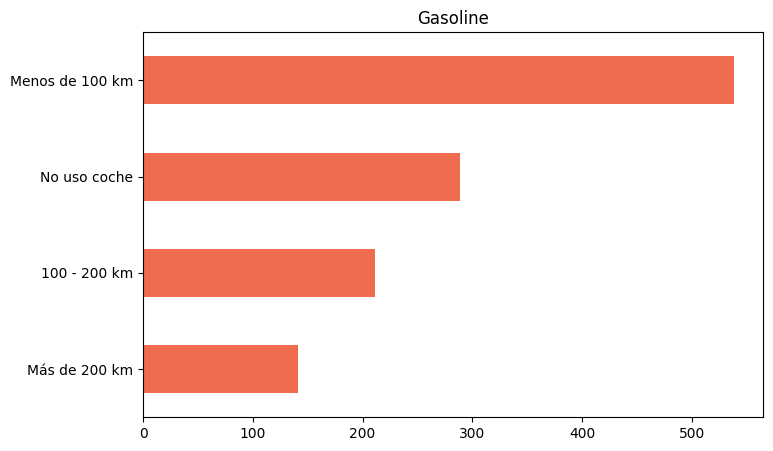

No tengo mascota    756
Menos de 50 €       265
Entre 50 y 100 €    142
Más de 100 €         16
NaN                   3
Name: Pet, dtype: int64


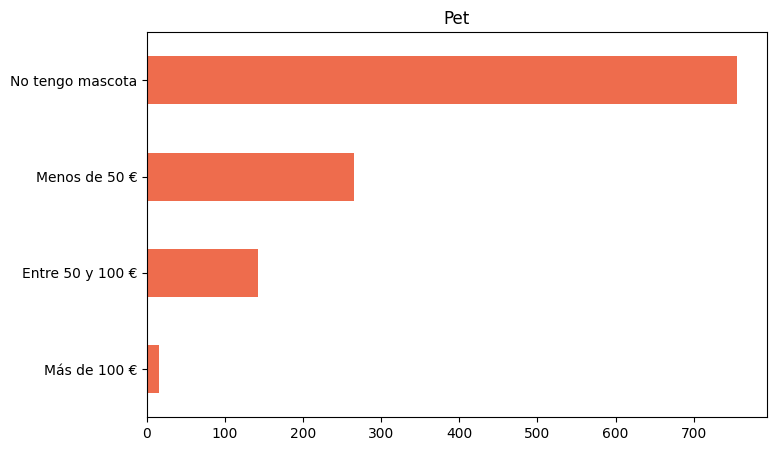

0              805
NaN             65
50              20
10              18
100             17
              ... 
75               1
2.0              1
6                1
300m             1
Ojalá tener      1
Name: Garden, Length: 96, dtype: int64


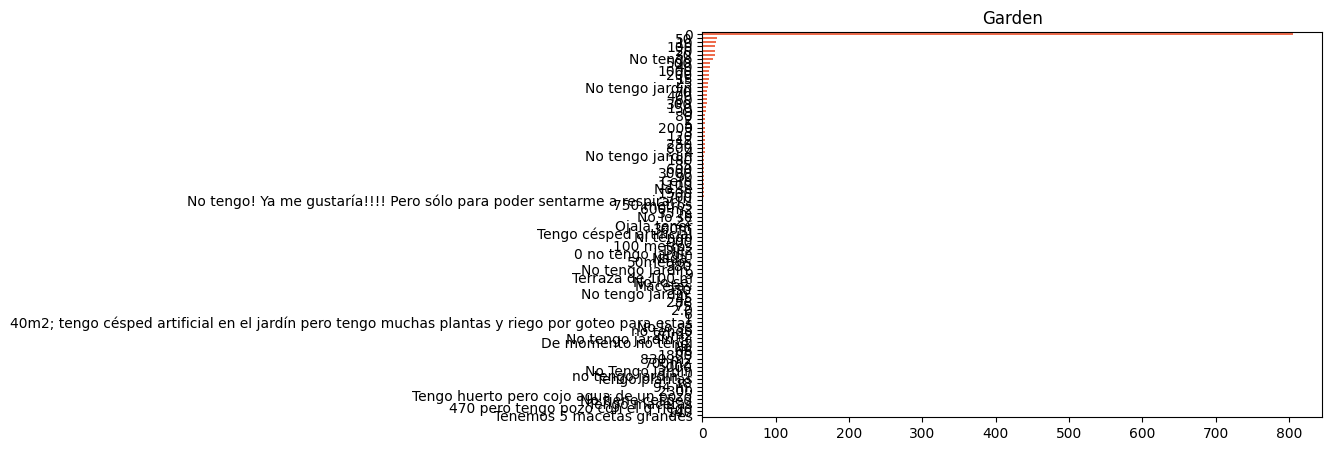

Entre 10€ y 40 €    594
Ni idea!            333
Más de 40 €         163
Menos de 10 €        88
NaN                   4
Name: Estimation, dtype: int64


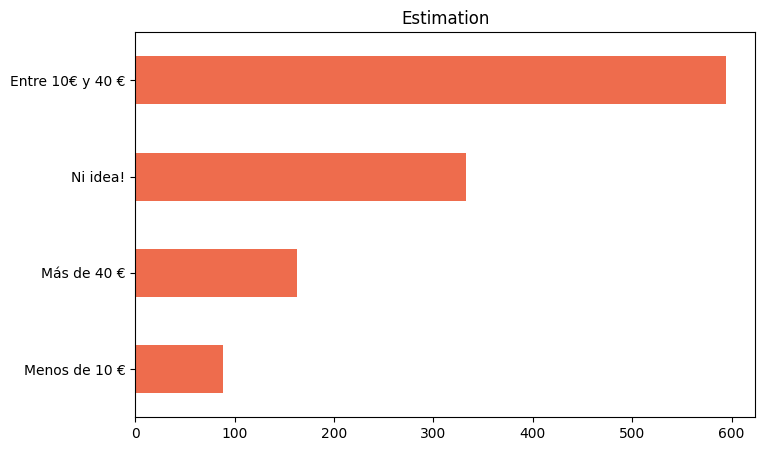

In [6]:
def plot_graph (column):
    print(df[column].value_counts(dropna= False))
    plt.figure(figsize=(8, 5))
    df[column].value_counts().sort_values(ascending=True).plot(kind='barh', ylabel= None, title= str(column))
    plt.show()


for i in list:
    plot_graph(i)


#### Check and Handle NaN



In [7]:
# All columns are type object, except residents float64

# Check for any NaN in df
print("Original length of df: ",len(df))
df.isna().sum()

Original length of df:  1182


Age                  4
Residents            4
Province             3
Interests            3
Shower               3
WashingMachine       3
DishWasher           3
EcoMode              3
WaterRecycling       3
GeneralRecycling     3
Meat                 3
Gasoline             3
Pet                  3
Garden              65
Estimation           4
dtype: int64

In [8]:
df.head()

,Age,Residents,Province,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!
1,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!
2,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!
3,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,A veces,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!
4,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,Siempre,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €


In [9]:
df.describe()

,Residents
count,1178.000000
mean,3.001698
std,1.279867
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,10.000000


## Feature Engineering

In [10]:
df2 = df.drop(columns= ['Meat', 'Residents','Province'])

In [11]:
# Pet: we are interested in knowing if they have or not.
df2.loc[df2["Pet"] == 'No tengo mascota', "Pet"] = "No"
df2.loc[df2["Pet"] != 'No', "Pet"] = "Yes"


# Estimation: we are interested in knowing if they are aware with their water expenditure or not.
df2.loc[df2["Estimation"] == 'Ni idea!', "Estimation"] = "No"
df2.loc[df2["Estimation"] != 'No', "Estimation"] = "Yes"

# WaterRecylcing: Include will try and yes => yes.
df2.loc[df2["WaterRecycling"] != 'No', "WaterRecycling"] = "Yes"

# Age: Yound and Old.
df2.loc[df2["Age"] == 'Entre 36 y 65 años', "Age"] = "Old"
df2.loc[df2["Age"] == 'Mayor de 65 años', "Age"] = "Old"
df2.loc[df2["Age"] != 'Old', "Age"] = "Young"

# Shower: 3 ranges.
df2.loc[df2["Shower"] == 'Menos de 5 minutos', "Shower"] = "Saver"
df2.loc[df2["Shower"] == 'Entre 5 y 10 minutos', "Shower"] = "Medium"
df2.loc[df2["Shower"] == 'Entre 11 y 15 minutos', "Shower"] = "Large"
df2.loc[df2["Shower"] == 'Más de 15 minutos', "Shower"] = "Large"


# General Recycling: Always or not always.
df2.loc[df2["GeneralRecycling"] != 'Siempre', "GeneralRecycling"] = "No siempre"



In [12]:
df2['GeneralRecycling'].value_counts()

Siempre       829
No siempre    353
Name: GeneralRecycling, dtype: int64

### Lets look into Garden column 🌷

In [13]:
#Primero necesitamos convertir la columna a str
df2['Garden'] = df2['Garden'].astype(str)

#Nos ayudamos de expresiones regulares
import re
def transformar_registro(registro):
    if registro.isdigit():
        return int(registro)
    else:
        numero_encontrado = re.search(r'\d+', registro)
        if numero_encontrado:
            return int(numero_encontrado.group())
        else:
            return 0
            
#hacemos la transformación correspondiente
df2['Garden'] = df2['Garden'].apply(transformar_registro)

In [14]:
# Shower: 3 ranges.
df2.loc[df2["Garden"] == 0, "Garden"] = "No"
df2.loc[df2["Garden"] !="No", "Garden"] = "Yes"

In [15]:
df2['Garden'].value_counts()

No     927
Yes    255
Name: Garden, dtype: int64

In [16]:
# Check for any NaN in df
print("Original length of df: ",len(df))
df2.isna().sum()

Original length of df:  1182


Age                 0
Interests           3
Shower              3
WashingMachine      3
DishWasher          3
EcoMode             3
WaterRecycling      0
GeneralRecycling    0
Gasoline            3
Pet                 0
Garden              0
Estimation          0
dtype: int64

In [17]:
# Remove rows with NaN values
df2 = df2.dropna()

print("Length with NaN removed: ",len(df2))
# Check all are removed
df2.isna().sum()

Length with NaN removed:  1179


Age                 0
Interests           0
Shower              0
WashingMachine      0
DishWasher          0
EcoMode             0
WaterRecycling      0
GeneralRecycling    0
Gasoline            0
Pet                 0
Garden              0
Estimation          0
dtype: int64

---


# Machine Learning

In [18]:
df2.head()

,Age,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Gasoline,Pet,Garden,Estimation
0,Old,Ayudar al ecosistema,Medium,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,Más de 200 km,No,No,No
1,Old,Ayudar al ecosistema,Saver,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,No siempre,Menos de 100 km,No,Yes,No
2,Old,Ahorrar dinero,Saver,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,No siempre,100 - 200 km,No,No,No
3,Young,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,Siempre,No,No siempre,Menos de 100 km,No,No,No
4,Old,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,A veces,Yes,Siempre,No uso coche,No,Yes,Yes


### Transmitting human intention (eco friendly) to Machine Learning model

In [19]:
# # ECO FRIENDLY => 0
# # MENOS ECO => 1
# # MENOS MENOS ECO => 2

### Car: we are interested how often they use car
df2.loc[df2["Gasoline"] == 'No uso coche', "Gasoline"] = 0
df2.loc[df2["Gasoline"] == 'Menos de 100 km', "Gasoline"] = 1
df2.loc[df2["Gasoline"] == '100 - 200 km', "Gasoline"] = 2
df2.loc[df2["Gasoline"] == 'Más de 200 km', "Gasoline"] = 3

# Interests
df2.loc[df2["Interests"] == "Ayudar al ecosistema", "Interests"] = 0
df2.loc[df2["Interests"] == "Ahorrar agua", "Interests"] = 0
df2.loc[df2["Interests"] == "Conocer mi huella hídrica", "Interests"] = 1
df2.loc[df2["Interests"] == "Ahorrar dinero", "Interests"] = 2

# WaterRecycling
df2.loc[df2["WaterRecycling"] == "Yes", "WaterRecycling"] = 0
df2.loc[df2["WaterRecycling"] == "No", "WaterRecycling"] = 1

# Shower
df2.loc[df2["Shower"] == "Saver", "Shower"] = 0
df2.loc[df2["Shower"] == "Medium", "Shower"] = 1
df2.loc[df2["Shower"] == "Large", "Shower"] = 2

# WashingMachine
df2.loc[df2["WashingMachine"] == "Menos de 3 veces", "WashingMachine"] = 0
df2.loc[df2["WashingMachine"] == "Entre 3 y 5 veces", "WashingMachine"] = 1
df2.loc[df2["WashingMachine"] == "Más de 5", "WashingMachine"] = 2

# DishWasher
df2.loc[df2["DishWasher"] == "1 vez al día", "DishWasher"] = 0
df2.loc[df2["DishWasher"] == "Entre 3 y 5 a la semana", "DishWasher"] = 1
df2.loc[df2["DishWasher"] == "Friego a mano", "DishWasher"] = 2

# EcoMode
df2.loc[df2["EcoMode"] == "Siempre", "EcoMode"] = 0
df2.loc[df2["EcoMode"] == "A veces", "EcoMode"] = 1
df2.loc[df2["EcoMode"] == "No sabía que existía ese modo", "EcoMode"] = 2

# GeneralRecycling
df2.loc[df2["GeneralRecycling"] == "Siempre", "GeneralRecycling"] = 0
df2.loc[df2["GeneralRecycling"] == "No siempre", "GeneralRecycling"] = 1


### One-hot encoding



In [20]:
df2 = pd.get_dummies(df2, columns= ["Age","Estimation","Pet","Garden"])

df2.head()

,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Gasoline,Age_Old,Age_Young,Estimation_No,Estimation_Yes,Pet_No,Pet_Yes,Garden_No,Garden_Yes
0,0,1,1,1,1,1,0,3,1,0,1,0,1,0,1,0
1,0,0,0,1,0,1,1,1,1,0,1,0,1,0,0,1
2,2,0,0,2,2,1,1,2,1,0,1,0,1,0,1,0
3,0,1,0,2,0,1,1,1,0,1,1,0,1,0,1,0
4,0,1,0,2,1,0,0,0,1,0,0,1,1,0,0,1


### Transform column type for k-means

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179 entries, 0 to 1181
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Interests         1179 non-null   object
 1   Shower            1179 non-null   object
 2   WashingMachine    1179 non-null   object
 3   DishWasher        1179 non-null   object
 4   EcoMode           1179 non-null   object
 5   WaterRecycling    1179 non-null   object
 6   GeneralRecycling  1179 non-null   object
 7   Gasoline          1179 non-null   object
 8   Age_Old           1179 non-null   uint8 
 9   Age_Young         1179 non-null   uint8 
 10  Estimation_No     1179 non-null   uint8 
 11  Estimation_Yes    1179 non-null   uint8 
 12  Pet_No            1179 non-null   uint8 
 13  Pet_Yes           1179 non-null   uint8 
 14  Garden_No         1179 non-null   uint8 
 15  Garden_Yes        1179 non-null   uint8 
dtypes: object(8), uint8(8)
memory usage: 92.1+ KB


In [22]:
df2.columns

Index(['Interests', 'Shower', 'WashingMachine', 'DishWasher', 'EcoMode',
       'WaterRecycling', 'GeneralRecycling', 'Gasoline', 'Age_Old',
       'Age_Young', 'Estimation_No', 'Estimation_Yes', 'Pet_No', 'Pet_Yes',
       'Garden_No', 'Garden_Yes'],
      dtype='object')

In [23]:
for i in df2.columns:
    df2[i] = df2[i].astype('Int64')

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179 entries, 0 to 1181
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Interests         1179 non-null   Int64
 1   Shower            1179 non-null   Int64
 2   WashingMachine    1179 non-null   Int64
 3   DishWasher        1179 non-null   Int64
 4   EcoMode           1179 non-null   Int64
 5   WaterRecycling    1179 non-null   Int64
 6   GeneralRecycling  1179 non-null   Int64
 7   Gasoline          1179 non-null   Int64
 8   Age_Old           1179 non-null   Int64
 9   Age_Young         1179 non-null   Int64
 10  Estimation_No     1179 non-null   Int64
 11  Estimation_Yes    1179 non-null   Int64
 12  Pet_No            1179 non-null   Int64
 13  Pet_Yes           1179 non-null   Int64
 14  Garden_No         1179 non-null   Int64
 15  Garden_Yes        1179 non-null   Int64
dtypes: Int64(16)
memory usage: 175.0 KB


## Elbow Method

In [25]:
# from sklearn.metrics import silhouette_score
# from sklearn.cluster import KMeans


# List Comprehension
# kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df) for k in range(1,5)]

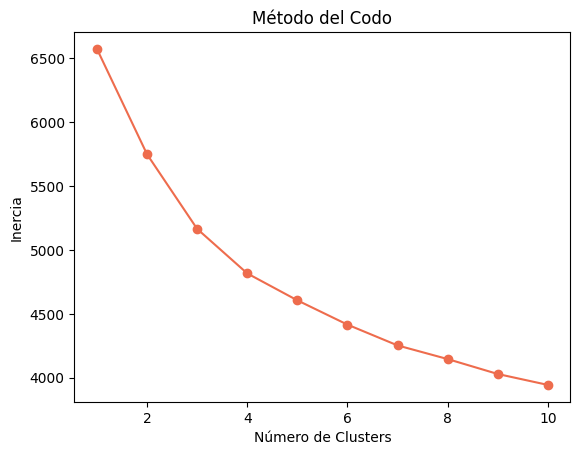

[0.57506361 0.79898219 0.56149279 1.10008482 0.66581849 0.51229856
 0.29686175 1.17302799 0.62256149 0.37743851 0.28244275 0.71755725
 0.64122137 0.35877863 0.78371501 0.21628499]


In [26]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Realizar el bucle para encontrar el número óptimo de clusters usando el método del codo
inertias = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df2)
    inertias.append(kmeans.inertia_)


# Graficar la curva del codo
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Entrenar el modelo K-means con el número óptimo de clusters seleccionado por el método del codo
optimal_num_clusters = np.argmin(np.diff(inertias)) + 1
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans.fit(df2)

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# Imprimir los centroides
for centroid in centroids:
    print(centroid)

### Silhouette Score

The Silhouette Score is a metric used to evaluate the `quality of clustering results.` It provides a measure of how well each sample in a cluster is assigned to its own cluster compared to other clusters. The Silhouette Score can range from -1 to 1, where:

A score close to +1 indicates that samples are well-clustered, with clear separation between clusters.
A score close to 0 indicates overlapping clusters or that samples are on or very close to the decision boundary between clusters.
A score close to -1 indicates that samples may have been assigned to the wrong clusters.

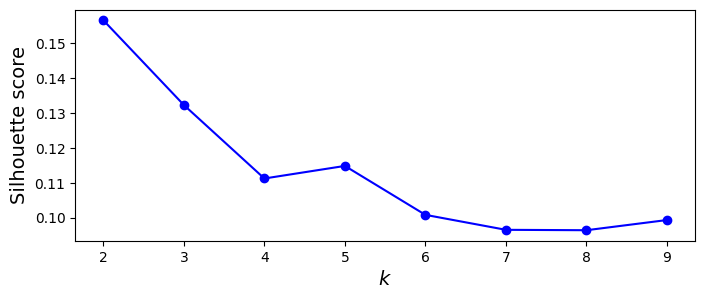

In [27]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df2) for k in range(1,10)]

silhouette_scores = [silhouette_score(df2, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [28]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

<AxesSubplot:ylabel='Data'>

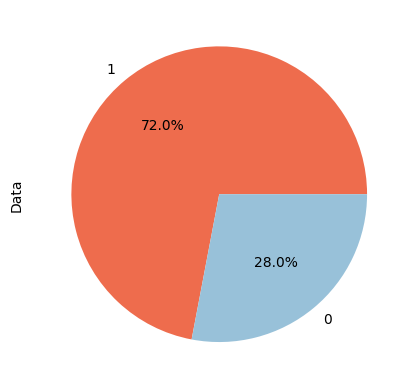

In [29]:
kmeans = KMeans(n_clusters = 2, random_state=42).fit(df2)

df2 = pd.DataFrame({"Data": kmeans.labels_})
df2["Data"].value_counts().plot.pie(autopct="%.1f%%")

In [30]:
# Here we can see the N number of centroids of each cluster
kmeans.cluster_centers_

array([[1.81212121, 1.03636364, 0.65757576, 1.07575758, 0.83939394,
        0.61212121, 0.47272727, 1.13636364, 0.37878788, 0.62121212,
        0.30606061, 0.69393939, 0.57575758, 0.42424242, 0.82121212,
        0.17878788],
       [0.0942285 , 0.70671378, 0.52414605, 1.10954064, 0.598351  ,
        0.47349823, 0.22850412, 1.18727915, 0.71731449, 0.28268551,
        0.27326266, 0.72673734, 0.66666667, 0.33333333, 0.76914016,
        0.23085984]])

In [31]:
# The lesser the model inertia, the better the model fit.
kmeans.inertia_

# We can see that the model has very high inertia. So, this is not a good model fit to the data.

5748.817539351108